In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ushape.csv", header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


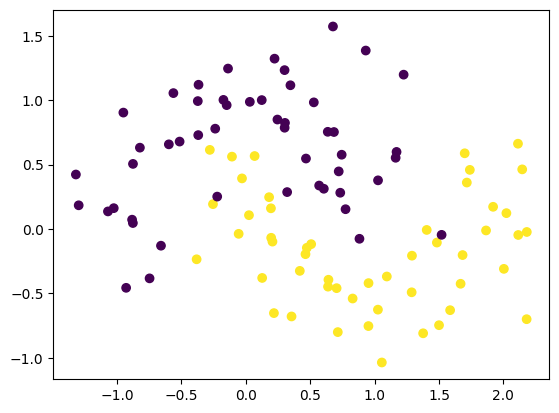

In [3]:
plt.scatter(df[0],df[1],c=df[2])

In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\HP\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.get_weights()

[array([[ 0.03917164, -0.65290725,  0.5493985 ,  0.6187648 ,  0.5716576 ,
          0.38206726, -0.36154005,  0.3780082 , -0.0240913 , -0.00947613],
        [-0.5892323 ,  0.4844802 ,  0.13161147,  0.32716638,  0.69707745,
         -0.32739097, -0.21833971, -0.2784718 ,  0.54644114,  0.6557407 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-3.0999714e-01,  5.2836955e-01, -4.0545404e-01,  2.8008223e-04,
          5.1739860e-01, -2.7235806e-02, -4.5081955e-01,  4.6410871e-01,
          5.0321090e-01,  4.2899054e-01],
        [ 2.8183824e-01,  3.9802611e-01, -5.2731270e-01, -8.4974021e-02,
          3.8601303e-01,  3.4631974e-01,  3.3388126e-01, -1.7070925e-01,
         -3.0259413e-01,  2.6714766e-01],
        [-3.9714986e-01, -7.0147812e-02, -1.4564696e-01, -4.7378656e-01,
          4.1783774e-01,  4.1550469e-01, -3.7986690e-01, -8.1636995e-02,
         -5.1268733e-01,  1.0073918e-01],
        [ 4.0418160e-01, -5.3922462e-01, -1.33836

In [8]:
initial_weights = model.get_weights()

In [9]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[-0.2523029 , -0.46814924,  1.172427  ,  0.04170864,  0.08570629,
          0.4097982 ,  0.871314  , -0.11658503, -0.79014045, -0.87700725],
        [ 0.77769095,  1.1029847 ,  0.6770128 ,  0.05134891, -0.24521562,
          0.7976158 ,  0.6745328 ,  0.1370674 ,  0.0976221 ,  0.03696654]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.4021884 ,  0.46620432,  0.32420602, -0.14852914, -0.39701855,
          0.17390156, -0.03280089,  0.43679944,  0.59225035,  0.18582219],
        [-0.45586112,  0.10548025, -0.02151521, -0.18982533,  0.10358921,
         -0.24124815,  0.01797396,  0.46380925,  0.07703291,  0.22605796],
        [-0.01975989,  0.19288023,  0.29604724, -0.12324905,  0.01947796,
         -0.41853786,  0.25237077,  0.03569995, -0.03323882,  0.19881327],
        [ 0.06817794,  0.18920039, -0.63774383,  0.21771185, -0.35194108,
          0.0915864 , -0.4112389 ,  0.06103306, -0.1960353 , -0.23747745],
        [ 0.57375

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.4812 - loss: 0.7249 - val_accuracy: 0.3000 - val_loss: 0.8187
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4500 - loss: 0.7061 - val_accuracy: 0.3000 - val_loss: 0.7750
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4812 - loss: 0.6846 - val_accuracy: 0.4000 - val_loss: 0.7337
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6094 - loss: 0.6617 - val_accuracy: 0.5500 - val_loss: 0.6957
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7312 - loss: 0.6006 - val_accuracy: 0.7000 - val_loss: 0.6614
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7359 - loss: 0.5958 - val_accuracy: 0.7500 - val_loss: 0.6285
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7695 - loss: 0.5565 - val_accuracy: 0.8000 - val_loss: 0.5984
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7523 - loss: 0.5565 - val_accuracy: 0.8500 - val_loss

In [14]:
model.get_weights()

[array([[-0.3272232 , -0.5295894 ,  1.2046931 ,  0.11888763,  0.16926245,
          0.46128634,  0.92948633, -0.20071928, -0.8211769 , -0.8879548 ],
        [ 0.7924139 ,  1.1019645 ,  0.75152165, -0.01859424, -0.29883006,
          0.75477374,  0.6315849 ,  0.20884334,  0.03399779,  0.01124184]],
       dtype=float32),
 array([ 0.00714364,  0.02116538,  0.18283495,  0.01941747, -0.03963615,
         0.10225167,  0.11486927,  0.0554806 ,  0.04414836,  0.07409893],
       dtype=float32),
 array([[ 0.33115727,  0.40526828,  0.29619285, -0.1652382 , -0.47448805,
          0.18949416,  0.02164713,  0.4827353 ,  0.6609581 ,  0.23569012],
        [-0.51651657,  0.04805143, -0.0518407 , -0.19902708,  0.03427525,
         -0.22514075,  0.06507277,  0.512069  ,  0.13854706,  0.27509734],
        [-0.03614818,  0.33229893,  0.34117445, -0.06734946,  0.0487095 ,
         -0.52212787,  0.2161071 , -0.03887429, -0.06920136,  0.13574392],
        [ 0.1047897 ,  0.3524676 , -0.59626377,  0.23454651, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

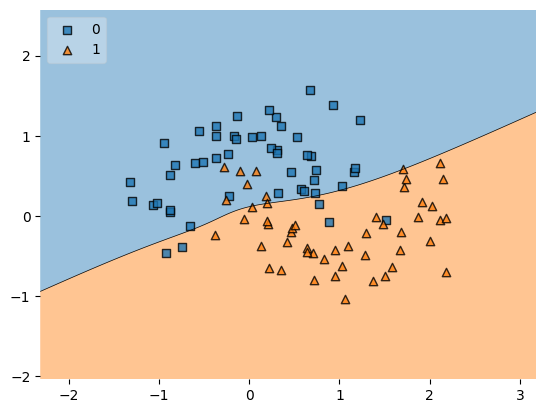

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [16]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.02057484998312237)

In [17]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.022684755658887532)